In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/jared/Library/Group Containers/UBF8T346G9.OneDriveStandaloneSuite/OneDrive.noindex/OneDrive/Documents/University stuff/Masters Year/DS4I/Assignment1/project':
  os.chdir(r'/Users/jared/Library/Group Containers/UBF8T346G9.OneDriveStandaloneSuite/OneDrive.noindex/OneDrive/Documents/University stuff/Masters Year/DS4I/Assignment1/project')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_93818/2880052412.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/importlib/_bootstrap.py": 1687560475.899881, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/importlib/_bootstrap_external.py": 1687560475.905339, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/codecs.py": 1687560473.470777, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/aliases.py": 1687560474.989399, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/__init__.py": 1687560474.985129, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/utf_8.py": 1687560475.43757, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/abc.py": 1687560473.346976, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/io.py": 1687560473.627098, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/stat.py": 1687560473.825673, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/_

In [2]:
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.initializers import he_normal
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import json
# import cuml
from IPython.display import Image, display

2023-10-15 21:05:44.373597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def neural_net(neurons_per_layer, l2_reg_value, epochs, dropout_rate=0.5):
    model = Sequential()

    # Input layer with He initialization
    model.add(Dense(neurons_per_layer[0], activation='relu', input_dim=inp_dim, kernel_regularizer=l2(l2_reg_value), kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Hidden layers with He initialization
    for num_neurons in neurons_per_layer[1:]:
        model.add(Dense(num_neurons, activation='relu', kernel_regularizer=l2(l2_reg_value), kernel_initializer=he_normal()))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(count_classes, activation='softmax'))

    # Adjusted learning rate for Adam optimizer
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_delta=0.0001)
    model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr, model_checkpoint])

    # Evaluate the model on training and test data
    scores_train = model.evaluate(X_train, y_train, verbose=1)
    scores_test = model.evaluate(X_test, y_test, verbose=0)


    print('Accuracy on training data: {:.2f}%\nError on training data: {:.2f}'.format(scores_train[1] * 100, (1 - scores_train[1]) * 100))
    print('Accuracy on test data: {:.2f}%\nError on test data: {:.2f}'.format(scores_test[1] * 100, (1 - scores_test[1]) * 100))

    # Access validation scores from the history object
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

    # Convert one-hot encoded ground truth labels to class labels
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

    return {
        'val_loss': val_loss,
        'val_accuracy': val_accuracy,
        'train_loss': history.history['loss'],
        'train_accuracy': history.history['accuracy'],
        'test_loss': scores_test[0],
        'test_accuracy': scores_test[1],
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'model': model,
        'history': history
        }

In [4]:
save_directory2 = "saved_files/assignment1_saved_results"

def save_model_params(output, base_filename):
    # If the output contains a Keras model
    if 'best_model' in output and hasattr(output['best_model'], 'save_weights'):
        print("Saving Keras model architecture and weights...")

        # Save the entire model (architecture + weights)
        output['best_model'].save(base_filename + '_full_model.h5')
        output['best_model'] = "MODEL_SAVED_SEPARATELY"
    else:
        print("No Keras model detected or model does not support weight saving.")

    # Serialize the modified dictionary
    with open(base_filename + '.pkl', 'wb') as file:
        pickle.dump(output, file)
    print(f"Data saved to {base_filename}.pkl")

def load_model_params(base_filename, model_architecture_func=None):
    # Deserialize the dictionary
    with open(base_filename + '.pkl', 'rb') as file:
        output = pickle.load(file)

    # If there's a placeholder for the Keras model
    if 'best_model' in output and output['best_model'] == "MODEL_SAVED_SEPARATELY":
        print("Loading Keras model architecture and weights...")

        # Load the entire model (architecture + weights)
        model = tf.keras.models.load_model(base_filename + '_full_model.h5')
        output['best_model'] = model
    else:
        print("No placeholder for Keras model detected in the loaded data.")

    return output

def save_results(results, save_directory):
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    # Save Accuracy Plot
    if 'fig_acc' in results:
        results['fig_acc'].savefig(os.path.join(save_directory, 'fig_acc.png'))
        del results['fig_acc']

    # Save Confusion Matrix
    if 'fig_cm' in results:
        results['fig_cm'].savefig(os.path.join(save_directory, 'fig_cm.png'))
        del results['fig_cm']

    # Save the rest of the results
    with open(os.path.join(save_directory, 'results.pkl'), 'wb') as f:
        pickle.dump(results, f)

def load_results(load_directory):
    results = {}

    # Load Accuracy Plot
    if os.path.exists(os.path.join(load_directory, 'fig_acc.png')):
        results['fig_acc'] = os.path.join(load_directory, 'fig_acc.png')

    # Load Confusion Matrix
    if os.path.exists(os.path.join(load_directory, 'fig_cm.png')):
        results['fig_cm'] = os.path.join(load_directory, 'fig_cm.png')

    # Load the rest of the results
    if os.path.exists(os.path.join(load_directory, 'results.pkl')):
        with open(os.path.join(load_directory, 'results.pkl'), 'rb') as f:
            data = pickle.load(f)
        results.update(data)

    return results

def display_loaded_results(loaded_results):
    # Display Accuracy Plot
    if 'fig_acc' in loaded_results:
        display(Image(filename=loaded_results['fig_acc']))

    # Display Results Table
    if 'results_table' in loaded_results:
        display(loaded_results['results_table'])

    # Display Confusion Matrix
    if 'fig_cm' in loaded_results:
        display(Image(filename=loaded_results['fig_cm']))

    # Display Test Classification Report as a DataFrame table
    if 'test_report' in loaded_results:
        report_df = pd.DataFrame(loaded_results['test_report'], index=['Value'])

        # Round values to 3 decimal places
        report_df = report_df.round(3)

        display(report_df.transpose())


In [5]:
# The data prep function is called after preparing the data according to BoW, TF-IDF and token embeddings.
def data_prep(x,y):
    # First, split into train and a temporary set (test + validation) using stratification
    X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed)

    # Split the temporary set into test and validation sets, again using stratification
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=seed)

    X_train = X_train.values
    X_val = X_val.values
    X_test = X_test.values

    label_encoder = LabelEncoder()

    # Fit and transform the labels to integer labels
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)  # Use transform, not fit_transform
    y_test_encoded = label_encoder.transform(y_test)  # Use transform, not fit_transform

    # Convert to one-hot encoded vector
    y_train = to_categorical(y_train_encoded)
    y_val = to_categorical(y_val_encoded)
    y_test = to_categorical(y_test_encoded)

    # dimensions
    inp_dim = X_test.shape[1]
    count_classes = y_test.shape[1]

    return {
        'X_train': X_train,
        'X_val': X_val,
        'X_test': X_test,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test,
        'inp_dim': inp_dim,
        'count_classes': count_classes
    }

In [6]:
def prepare_data(data_preparation_func, x, y):
    data = data_preparation_func(x, y)
    return data


def hyperparameter_search_nn(seed, neural_net_func, X_train, y_train, X_val, y_val, X_test, y_test):
    np.random.seed(seed)

    neurons_space = [[800, 300], [800, 300, 100]]
    l2_reg_space = [0, 0.001, 0.01]
    dropout_space = [0.2, 0.4]
    num_epochs_space = [20]

    best_val_accuracy = 0
    best_params = {}
    best_model = None
    best_train_accuracies = []
    best_val_accuracies = []

    results_list = []

    for neurons in neurons_space:
        for l2_reg in l2_reg_space:
            for dropout_rate in dropout_space:
                for epochs in num_epochs_space:
                    print(f"Training with: neurons={neurons}, l2_reg={l2_reg}, dropout={dropout_rate}, epochs={epochs}")

                    results = neural_net_func(neurons_per_layer=neurons,
                                              l2_reg_value=l2_reg,
                                              epochs=epochs,
                                              dropout_rate=dropout_rate)

                    results_list.append({
                        'neurons': str(neurons),
                        'l2_reg': l2_reg,
                        'dropout_rate': dropout_rate,
                        'epochs': epochs,
                        'train_accuracy': results['train_accuracy'][-1],
                        'val_accuracy': results['val_accuracy'][-1],
                        'test_accuracy': results['test_accuracy']
                    })

                    if results['val_accuracy'][-1] > best_val_accuracy:
                        best_val_accuracy = results['val_accuracy'][-1]
                        best_model = results['model']
                        history = results['history']
                        best_params = {
                            'neurons': neurons,
                            'l2_reg': l2_reg,
                            'dropout_rate': dropout_rate,
                            'epochs': epochs,
                            'val_accuracy': best_val_accuracy
                        }
                        best_train_accuracies = results['train_accuracy']
                        best_val_accuracies = results['val_accuracy']

    results_df = pd.DataFrame(results_list)

    output = {
        'best_train_accuracies': best_train_accuracies,
        'best_val_accuracies': best_val_accuracies,
        'best_model': best_model,
        'results_df': results_df,
        'history': history
    }

    return output

def train_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test, seed):
    scaler = cuml.preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    y_train_int = np.argmax(y_train, axis=1)
    y_val_int = np.argmax(y_val, axis=1)
    y_test_int = np.argmax(y_test, axis=1)

    best_C = 1
    best_val_accuracy = 0
    C_values = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
    results_list = []

    for C in C_values:
        svm_clf = cuml.svm.SVC(C=C, class_weight='balanced', random_state=seed, max_iter=1000)
        svm_clf.fit(X_train_scaled, y_train_int)
        y_val_pred = svm_clf.predict(X_val_scaled)
        val_accuracy = cuml.metrics.accuracy_score(y_val_int, y_val_pred)

        results_list.append({
            'C': C,
            'train_accuracy': cuml.metrics.accuracy_score(y_train_int, svm_clf.predict(X_train_scaled)),
            'val_accuracy': val_accuracy,
            'test_accuracy': cuml.metrics.accuracy_score(y_test_int, svm_clf.predict(X_test_scaled))
        })

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_C = C

    best_svm_clf = cuml.svm.SVC(C=best_C, class_weight='balanced', random_state=seed, max_iter=1000)
    best_svm_clf.fit(X_train_scaled, y_train_int)

    results_df = pd.DataFrame(results_list)

    output = {
        'best_model': best_svm_clf,
        'results_df': results_df
    }

    return output

def train_evaluate_nb(X_train, y_train, X_val, y_val, X_test, y_test):
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
    results_list = []

    for alpha in param_grid['alpha']:
        nb_clf = MultinomialNB(alpha=alpha)
        nb_clf.fit(X_train, np.argmax(y_train, axis=1))
        
        results_list.append({
            'alpha': alpha,
            'train_accuracy': accuracy_score(np.argmax(y_train, axis=1), nb_clf.predict(X_train)),
            'val_accuracy': accuracy_score(np.argmax(y_val, axis=1), nb_clf.predict(X_val)),
            'test_accuracy': accuracy_score(np.argmax(y_test, axis=1), nb_clf.predict(X_test))
        })

    results_df = pd.DataFrame(results_list)
    best_alpha = results_df.loc[results_df['val_accuracy'].idxmax(), 'alpha']
    best_nb_clf = MultinomialNB(alpha=best_alpha)
    best_nb_clf.fit(X_train, np.argmax(y_train, axis=1))

    output = {
        'best_model': best_nb_clf,
        'results_df': results_df
    }

    return output

In [7]:
def plot_accuracies(title, x_label, x_data, train_accuracies, val_accuracies):
    """
    Plots training and validation accuracies.

    Parameters:
        - title (str): Title for the plot.
        - x_label (str): X-axis label.
        - x_data (list): X-axis data.
        - train_accuracies (list): Training accuracies.
        - val_accuracies (list): Validation accuracies.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, train_accuracies, '-o', label='Training Accuracy', color='blue')
    plt.plot(x_data, val_accuracies, '-o', label='Validation Accuracy', color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    return plt.gcf()

def display_results_table(df):
    """
    Displays the results DataFrame as a table.

    Parameters:
        - df (DataFrame): Results DataFrame.
    """
    display(df)


def plot_confusion_matrix(y_true, y_pred, title, class_labels=None):
    """
    Plots a confusion matrix using seaborn's heatmap() with adjustments for label formats.

    Parameters:
        - y_true (array-like): True labels.
        - y_pred (array-like): Predicted labels.
        - title (str): Title for the heatmap.
        - class_labels (list, optional): List of class labels.
    """
    # Convert one-hot encoded labels to label encoded format if necessary
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    return plt.gcf()


def visualize_and_verify_results(output, X_val, y_val, X_test, y_test, classifier_type, class_labels=None):
    """
    Extended visualization and verification function to handle SVM and NB predictions.

    Parameters:
        - output (dict): Output from the tuning methods.
        - X_val (array-like): Validation features.
        - y_val (array-like): Validation targets.
        - X_test (array-like): Test features.
        - y_test (array-like): Test targets.
        - classifier_type (str): One of 'nn', 'svm', or 'nb'.
        - class_labels (list, optional): List of class labels.

    Returns:
        results (dict): Dictionary containing plots, tables, and reports.
    """
    results = {}

    # 1. Plot accuracies
    if classifier_type == 'nn':
        fig_acc = plot_accuracies("Neural Network Accuracies",
                                  "Epochs",
                                  list(range(1, len(output['best_train_accuracies']) + 1)),
                                  output['best_train_accuracies'],
                                  output['best_val_accuracies'])
        results['fig_acc'] = fig_acc
    elif classifier_type in ['svm', 'nb']:
        param_key = 'C' if classifier_type == 'svm' else 'alpha'
        fig_acc = plot_accuracies(f"{classifier_type.upper()} Accuracies",
                                  param_key,
                                  output['results_df'][param_key],
                                  output['results_df']['train_accuracy'],
                                  output['results_df']['val_accuracy'])
        results['fig_acc'] = fig_acc

    # 2. Display results table
    if classifier_type == 'nn':
        metrics = {
            'train_accuracy': output['best_train_accuracies'][-1],
            'val_accuracy': output['best_val_accuracies'][-1]
        }
        results['table_nn'] = pd.DataFrame([metrics])
    else:
        results['table_others'] = output['results_df']

    # 3. Plot confusion matrices and generate reports
    if 'best_model' in output:
        if classifier_type == 'nn':
            y_pred = output['best_model'].predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
        else:
            y_pred_classes = output['best_model'].predict(X_test)

        y_true_classes = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 and y_test.shape[1] > 1 else y_test
        fig_cm = plot_confusion_matrix(y_true_classes,
                                       y_pred_classes,
                                       f"Test Confusion Matrix - {classifier_type.upper()}",
                                       class_labels)
        results['fig_cm'] = fig_cm

        # 4. Classification reports
        precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
        recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
        f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

        results['test_report'] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    return results

In [8]:
def bow_x(data):
    # Extract relevant columns
    text_data = data['sentence']
    y = data['president']

    # Initialize a CountVectorizer for BOW representation
    vectorizer = CountVectorizer(lowercase=True, token_pattern=r"(?u)\b\w+\b", stop_words='english')

    # Fit and transform the text data
    X = vectorizer.fit_transform(text_data)

    # Create a DataFrame from the BOW representation
    bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    return bow_df


def tf_idf(df):
    sentences = df['sentence'].tolist()

    # Create a TfidfVectorizer with stop words removal
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Fit and transform the sentences to compute TF-IDF values
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

    # Create a new dataframe with TF-IDF values
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    return tfidf_df

def tokenize_text(text_data, labels, max_features=10000, maxlen=100):
    # Tokenization
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(text_data)
    sequences = tokenizer.texts_to_sequences(text_data)

    # Filter out sequences that have length 0
    seq_ok = [i for i, s in enumerate(sequences) if len(s) > 0]
    valid_labels = [labels.iloc[i] for i in seq_ok]

    # Padding sequences
    filtered_sequences = [sequences[i] for i in seq_ok]
    x_pad = pad_sequences(filtered_sequences, maxlen=maxlen)


    return x_pad, valid_labels, tokenizer

In [9]:
data_path = "data/sentences.csv"
sentence_data = pd.read_csv(data_path)

# Drop rows where 'sentence' is NaN
sentence_data = sentence_data.dropna(subset=['sentence'])

# Get the names of the two presidents with the lowest sentence counts
remove_presidents = sentence_data['president'].value_counts().tail(2).index.tolist()

# Filter the data to exclude sentences from these two presidents
sentence_data = sentence_data[~sentence_data['president'].isin(remove_presidents)]

# Set the seed
seed = 1

# Set the save directory of the models

In [10]:
save_directory = "saved_files/assignment1_savedvals"

In [11]:
x = bow_x(sentence_data)
y = sentence_data['president']

# Prepare data
data = prepare_data(data_prep, x, y)
X_train, y_train, X_val, y_val, X_test, y_test, inp_dim, count_classes = data['X_train'], data['y_train'], data['X_val'], data['y_val'], data['X_test'], data['y_test'], data['inp_dim'], data['count_classes']

# Scaled data for SVM
# scaler = cuml.preprocessing.StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# y_train_int = np.argmax(y_train, axis=1)
# y_val_int = np.argmax(y_val, axis=1)
# y_test_int = np.argmax(y_test, axis=1)

In [12]:
# with tf.device('/device:GPU:0'):
#  nn_bow_tune = hyperparameter_search_nn(seed,
#                                        neural_net,
#                                        X_train, y_train,
#                                        X_val, y_val,
#                                        X_test, y_test)

# # Saving the model parameters
# save_model_params(nn_bow_tune, os.path.join(save_directory, 'nn_bow_tune'))

In [13]:
# Load the tuned output
# nn_bow_tuned = load_model_params(os.path.join(save_directory, 'nn_bow_tune'))

# visualize_and_verify_results(nn_bow_tuned, X_val, y_val, X_test, y_test, 'nn', class_labels=None)

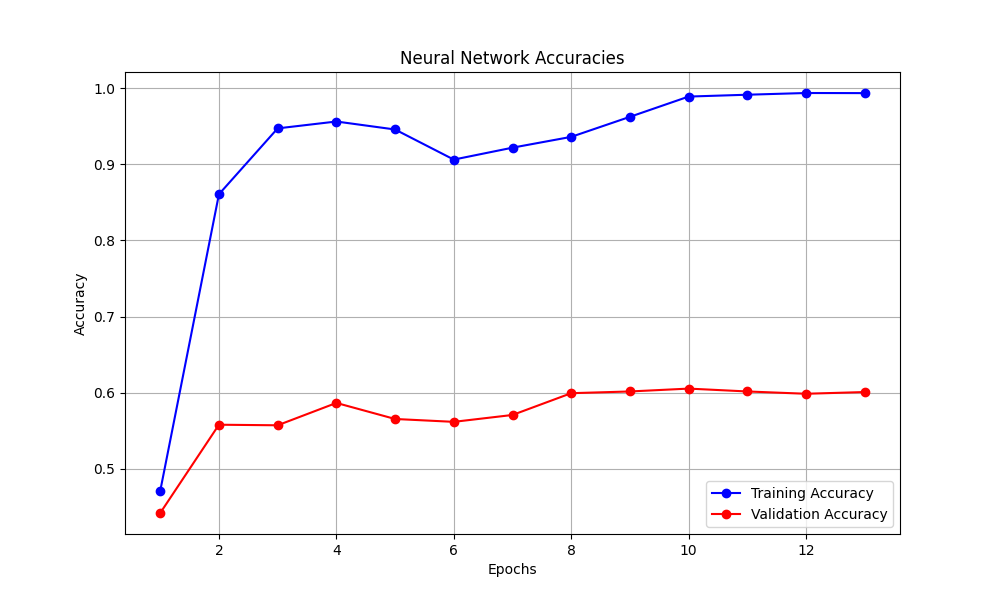

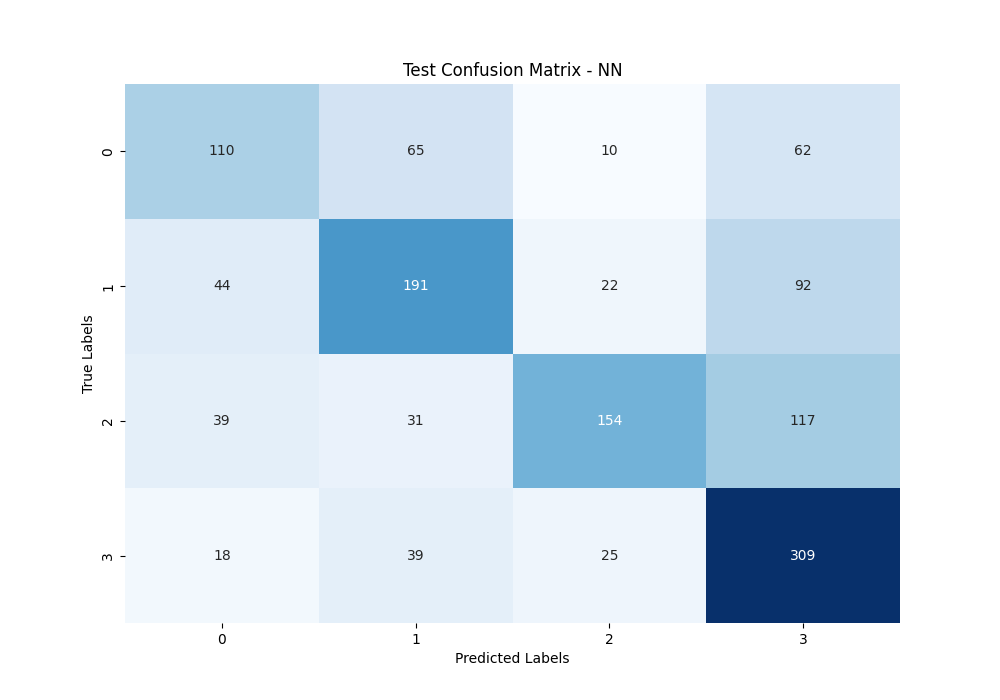

,Value
precision,0.595
recall,0.575
f1_score,0.569


In [14]:
save_path = save_directory2 + "/bow_nn_results"
# save_results(bow_nn_results, save_path)
loaded_results = load_results(save_path)

display_loaded_results(loaded_results)

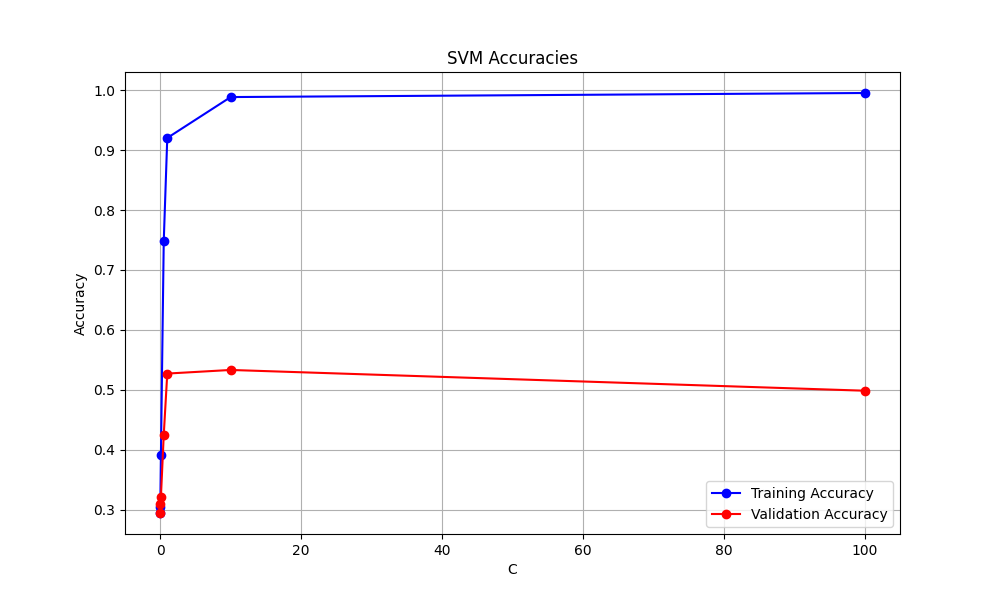

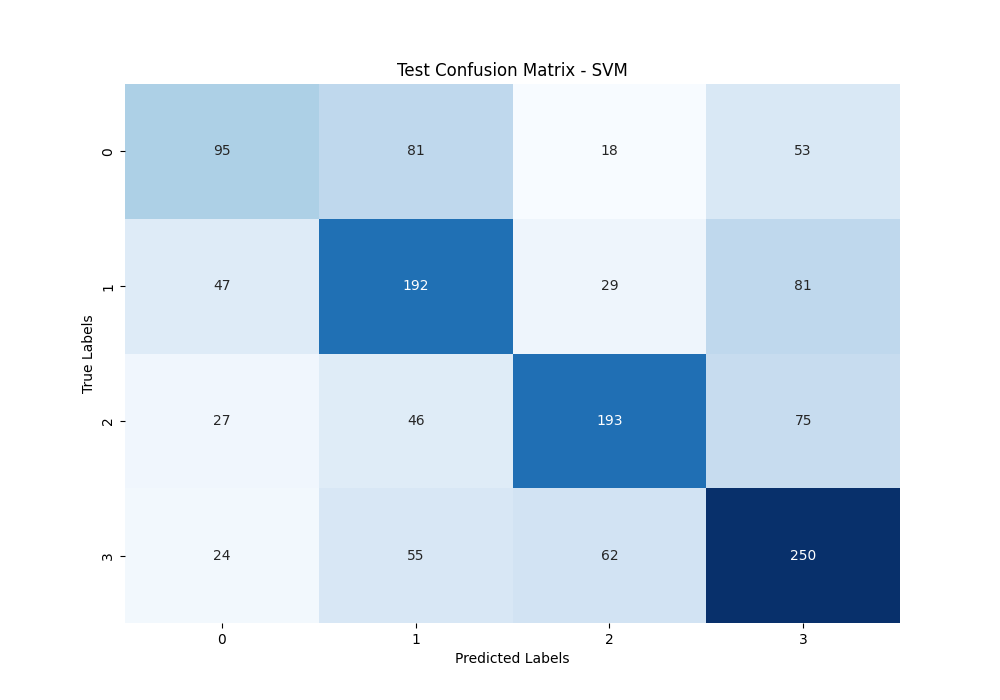

,Value
precision,0.551
recall,0.550
f1_score,0.547


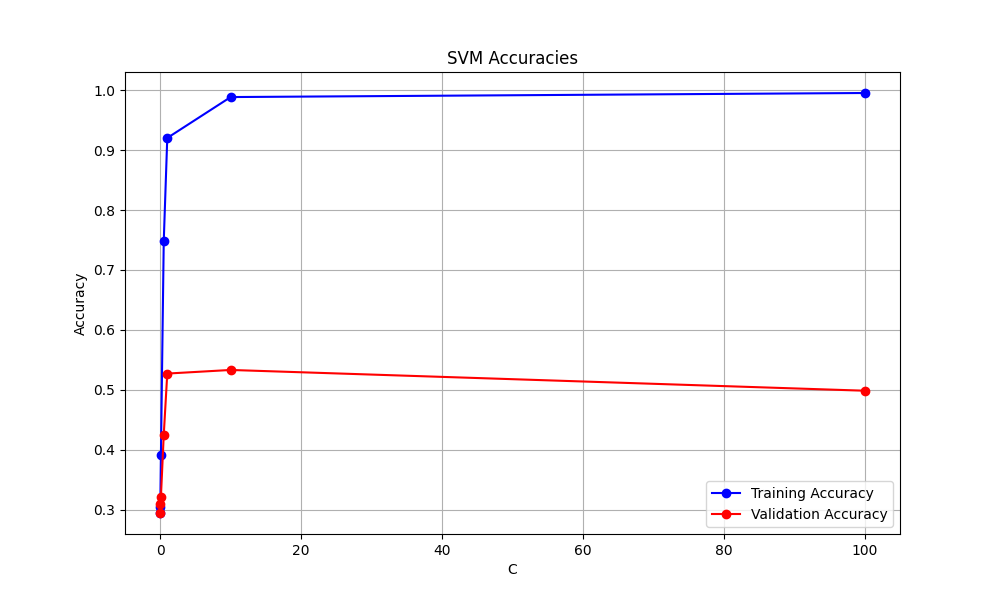

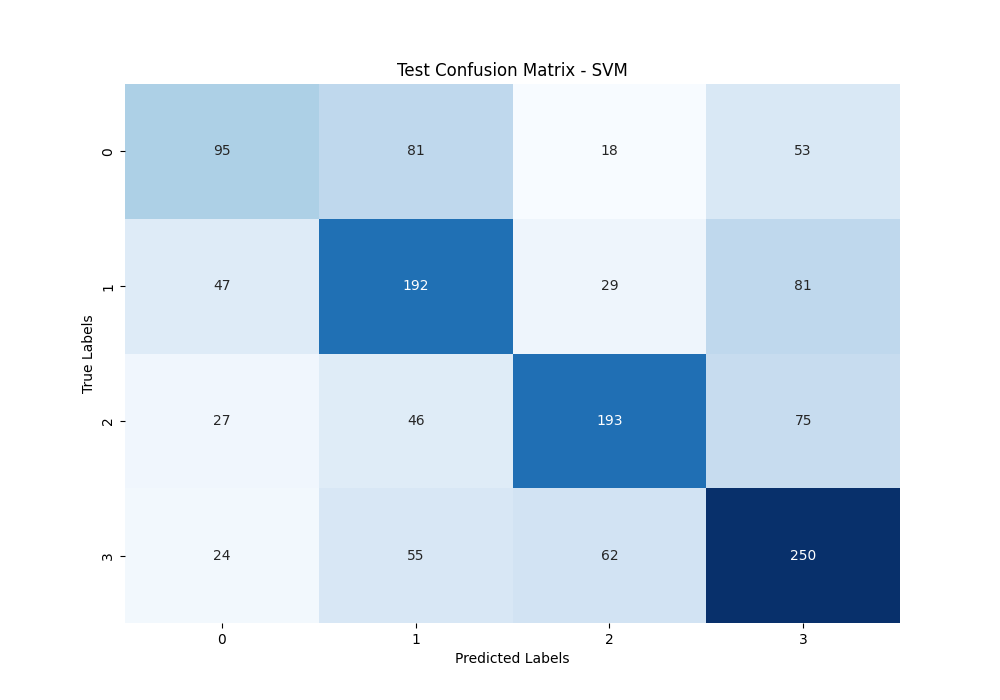

,Value
precision,0.551
recall,0.550
f1_score,0.547


In [15]:
# svm_results_bow = train_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test, seed)

# # Save the model parameters
# save_model_params(svm_results_bow, os.path.join(save_directory, 'svm_bow_results'))

# # Load the saved model parameters
# svm_results_bow = load_model_params(os.path.join(save_directory, 'svm_bow_results'))

# results = visualize_and_verify_results(svm_results_bow, X_val_scaled, y_val_int, X_test_scaled, y_test_int, 'svm', class_labels=None)

# Save and load the results for later

save_path = save_directory2 + "/bow_svm_results"
# save_results(results, save_path)
loaded_results = load_results(save_path)
display_loaded_results(loaded_results)

display_loaded_results(loaded_results)

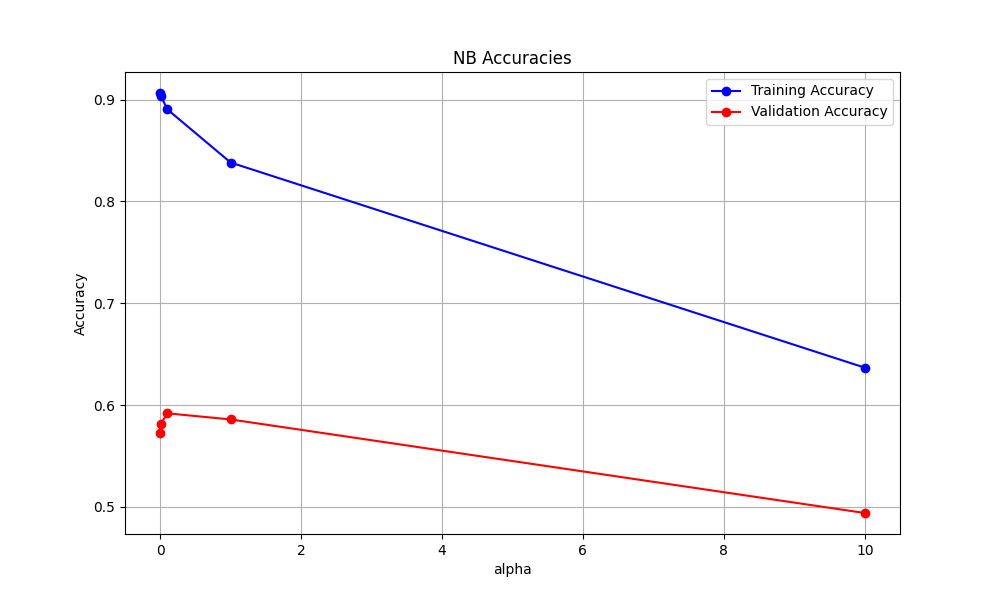

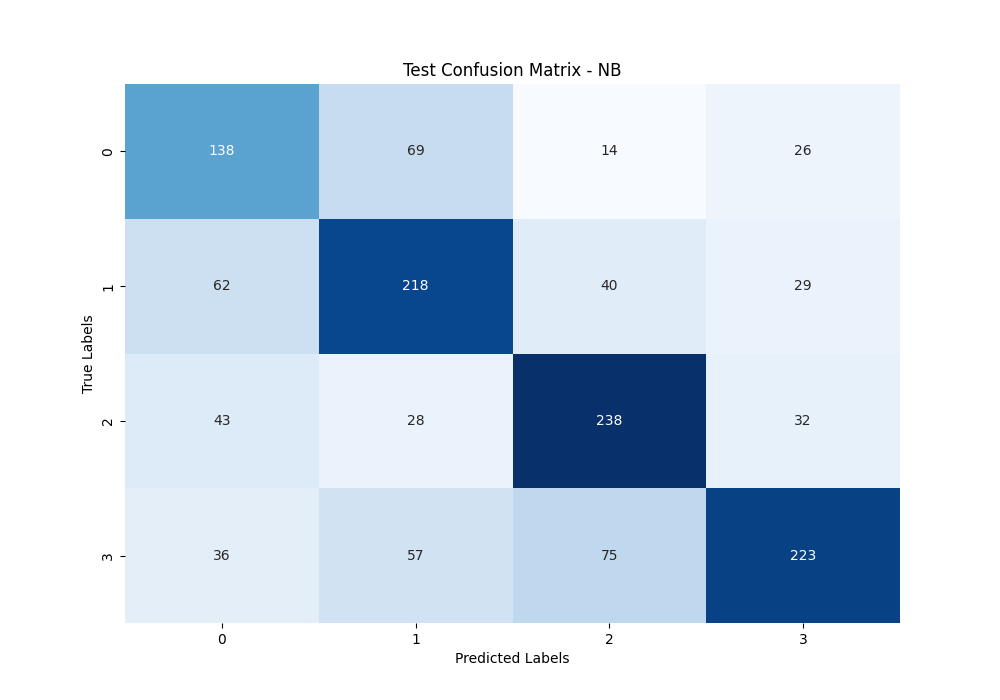

,Value
precision,0.624
recall,0.615
f1_score,0.616


In [16]:
# nb_results_bow = train_evaluate_nb(X_train, y_train, X_val, y_val, X_test, y_test)

# # Save the model parameters
# save_model_params(nb_results_bow, os.path.join(save_directory, 'nb_bow_results'))

# # Load the saved model parameters
# nb_results_bow = load_model_params(os.path.join(save_directory, 'nb_bow_results'))

# results = visualize_and_verify_results(nb_results_bow, X_val, y_val, X_test, y_test, 'nb', class_labels=None)

# Save and load the results for later

save_path = save_directory2 + "/bow_nb_results"
# save_results(results, save_path)
loaded_results = load_results(save_path)
display_loaded_results(loaded_results)

In [17]:
# import idf data
x = tf_idf(sentence_data)
y = sentence_data['president']

# Prepare the data
data = prepare_data(data_prep, x, y)
X_train, y_train, X_val, y_val, X_test, y_test, inp_dim, count_classes = data['X_train'], data['y_train'], data['X_val'], data['y_val'], data['X_test'], data['y_test'], data['inp_dim'], data['count_classes']


# Scaled data for SVM
# scaler = cuml.preprocessing.StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# y_train_int = np.argmax(y_train, axis=1)
# y_val_int = np.argmax(y_val, axis=1)
# y_test_int = np.argmax(y_test, axis=1)

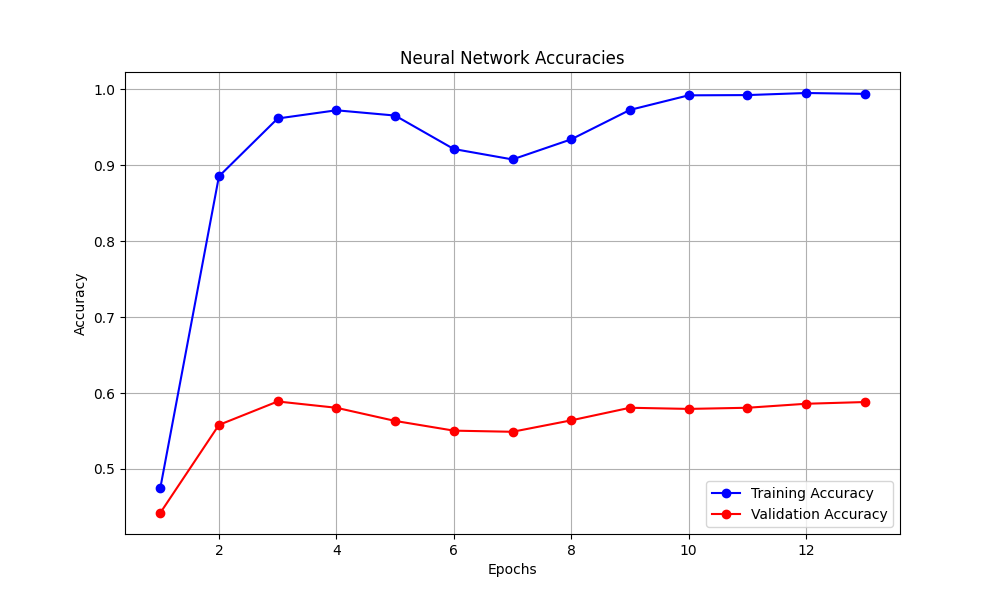

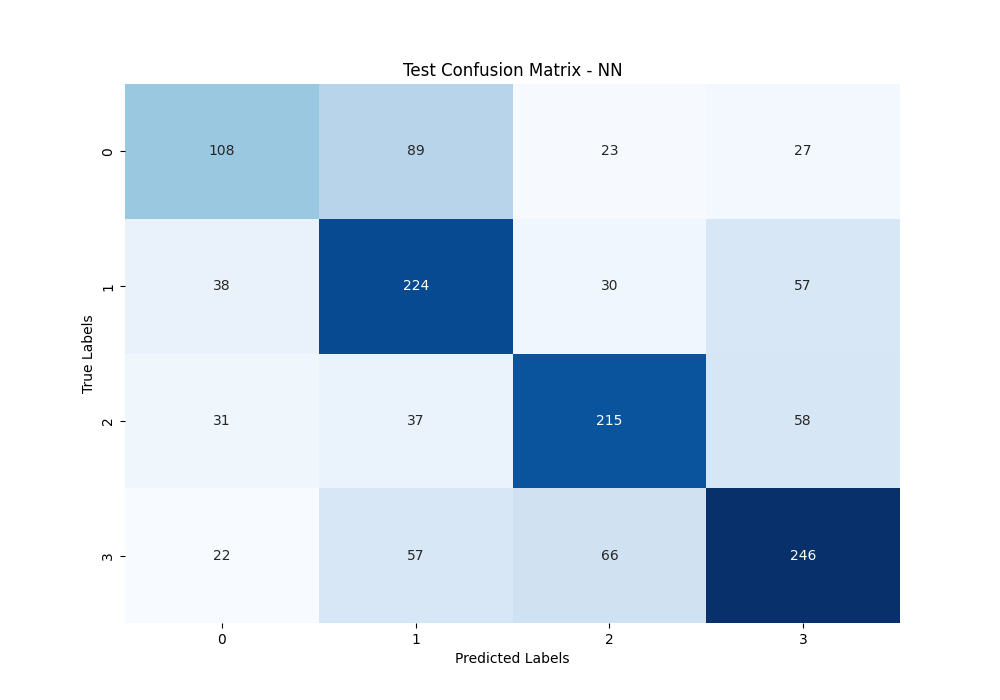

,Value
precision,0.598
recall,0.597
f1_score,0.595


In [18]:
# with tf.device('/device:GPU:0'):
#   nn_tf_tune = hyperparameter_search_nn(seed,
#                                         neural_net,
#                                         X_train, y_train,
#                                         X_val, y_val,
#                                         X_test, y_test)

# # Saving the model parameters
# save_model_params(nn_tf_tune, os.path.join(save_directory, 'nn_tf_results'))

# # Load the tuned output
# nn_tf_tune = load_model_params(os.path.join(save_directory, 'nn_tf_results'))

# results = visualize_and_verify_results(nn_tf_tune, X_val, y_val, X_test, y_test, 'nn', class_labels=None)

# Save and load the results for later

save_path = save_directory2 + "/tfidf_nn_results"
# save_results(results, save_path)
loaded_results = load_results(save_path)
display_loaded_results(loaded_results)

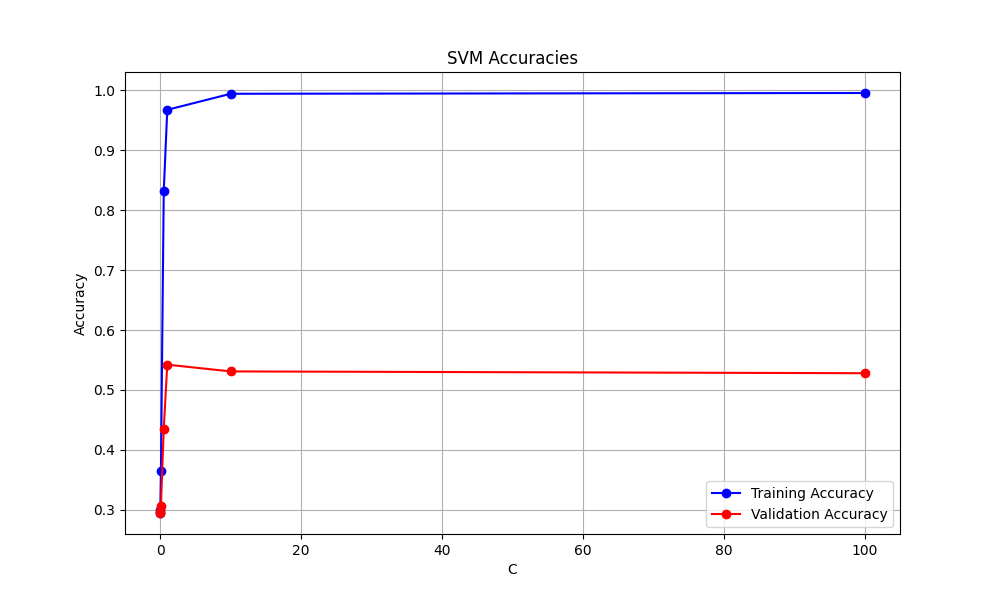

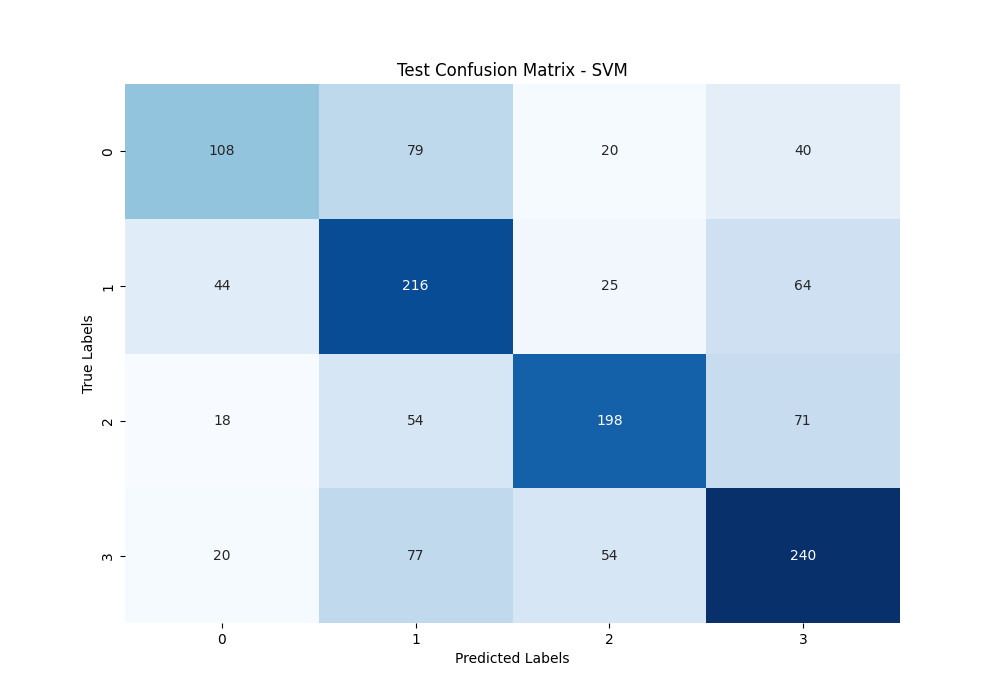

,Value
precision,0.580
recall,0.574
f1_score,0.573


In [19]:
# svm_results_tf = train_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test, seed)

# save_model_params(svm_results_tf, os.path.join(save_directory, 'svm_tf_results'))

# svm_results_tf = load_model_params(os.path.join(save_directory, 'svm_tf_results'))

# results = visualize_and_verify_results(svm_results_tf, X_val_scaled, y_val_int, X_test_scaled, y_test_int, 'svm', class_labels=None)

# Save and load the results for later

save_path = save_directory2 + "/tfidf_svm_results"
# save_results(results, save_path)
loaded_results = load_results(save_path)
display_loaded_results(loaded_results)

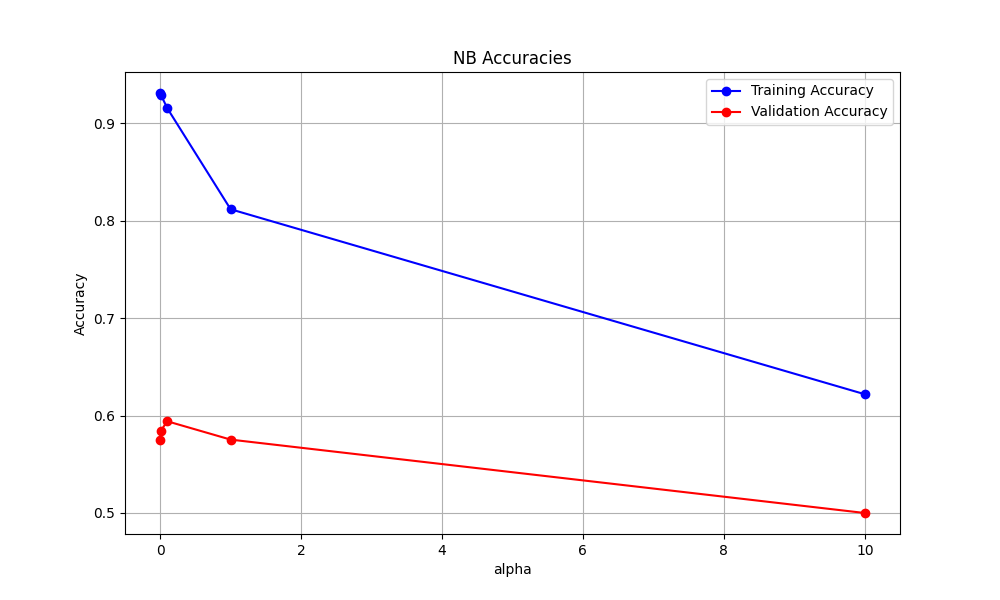

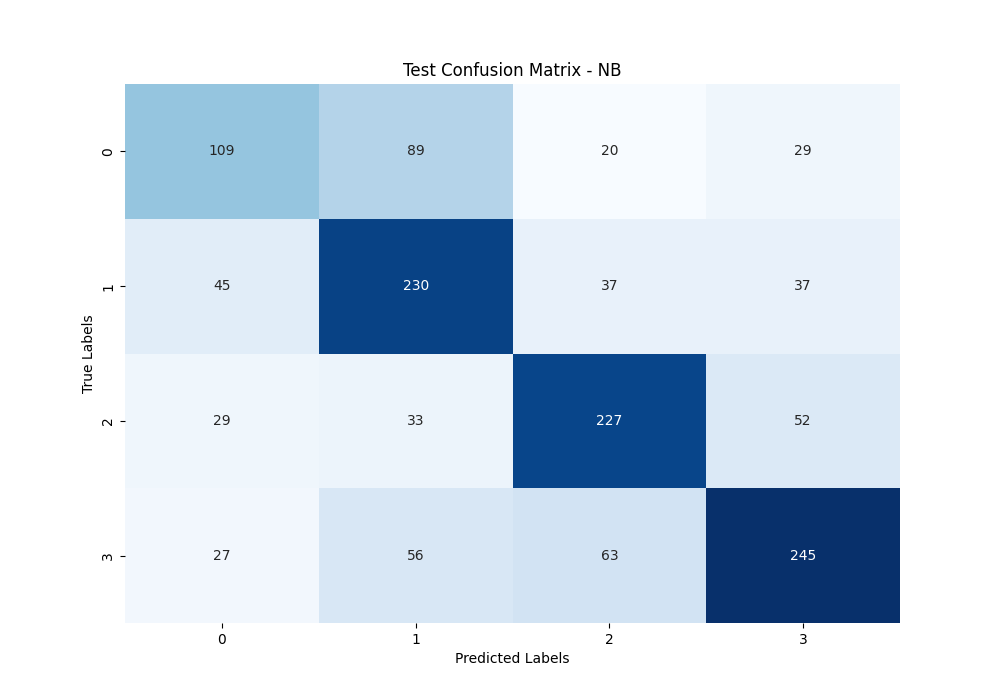

,Value
precision,0.611
recall,0.611
f1_score,0.609


In [20]:
# nb_results_tf = train_evaluate_nb(X_train, y_train, X_val, y_val, X_test, y_test)

# save_model_params(nb_results_tf, os.path.join(save_directory, 'nb_tf_results'))

# nb_results_tf = load_model_params(os.path.join(save_directory, 'nb_tf_results'))

# results = visualize_and_verify_results(nb_results_tf, X_val, y_val, X_test, y_test, 'nb', class_labels=None)

# Save and load the results for later

save_path = save_directory2 + "/tfidf_nb_results"
# save_results(results, save_path)
loaded_results = load_results(save_path)
display_loaded_results(loaded_results)

In [21]:
x, y, _ = tokenize_text(sentence_data['sentence'], sentence_data['president'])
x_df = pd.DataFrame(x)

data = prepare_data(data_prep, x_df, y)
X_train, y_train, X_val, y_val, X_test, y_test, inp_dim, count_classes = data['X_train'], data['y_train'], data['X_val'], data['y_val'], data['X_test'], data['y_test'], data['inp_dim'], data['count_classes']

# Scaled data for SVM
# scaler = cuml.preprocessing.StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# y_train_int = np.argmax(y_train, axis=1)
# y_val_int = np.argmax(y_val, axis=1)
# y_test_int = np.argmax(y_test, axis=1)

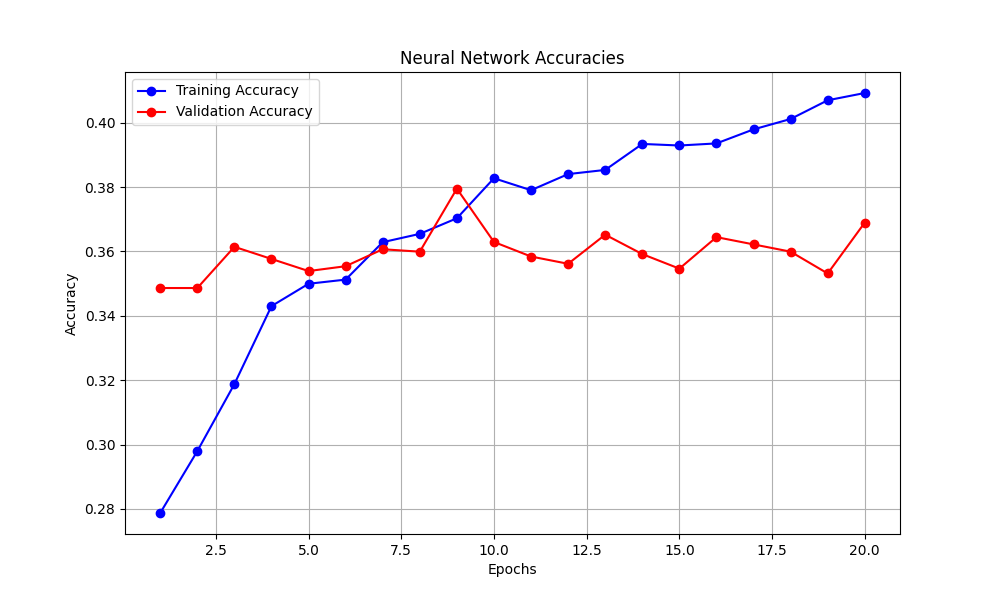

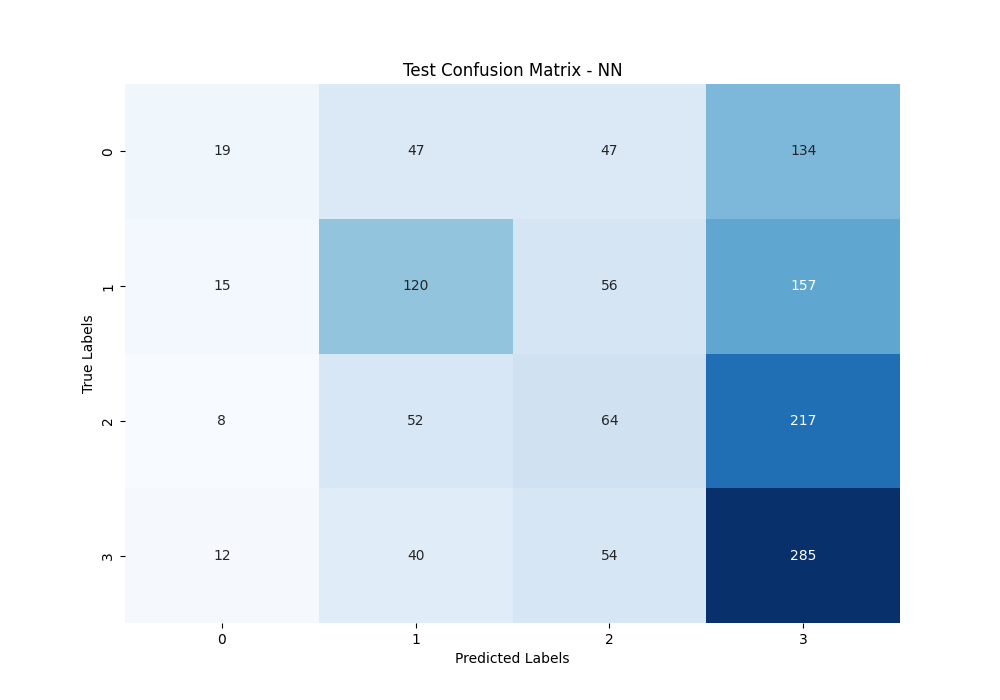

,Value
precision,0.367
recall,0.368
f1_score,0.328


In [22]:
# with tf.device('/device:GPU:0'):
#   nn_emb_tune = hyperparameter_search_nn(seed,
#                                         neural_net,
#                                         X_train, y_train,
#                                         X_val, y_val,
#                                         X_test, y_test)

# # Saving the model parameters
# save_model_params(nn_emb_tune, os.path.join(save_directory, 'nn_emb_results'))

# # Load the saved model parameters
# nn_emb_tune = load_model_params(os.path.join(save_directory, 'nn_emb_results'))

# results = visualize_and_verify_results(nn_emb_tune, X_val, y_val, X_test, y_test, 'nn', class_labels=None)

# Save and load the results for later

save_path = save_directory2 + "/emb_nn_results"
# save_results(results, save_path)
loaded_results = load_results(save_path)
display_loaded_results(loaded_results)

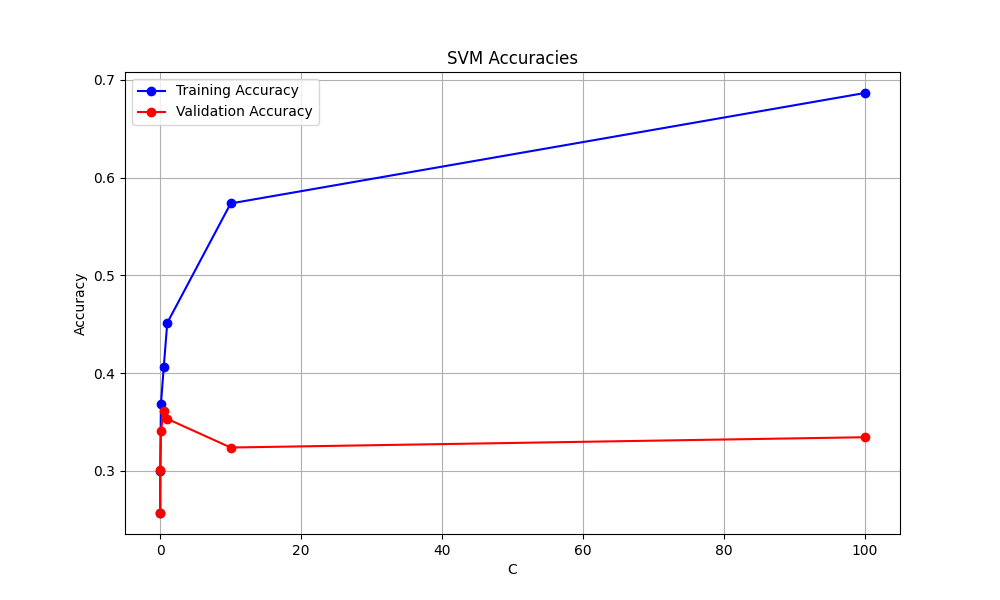

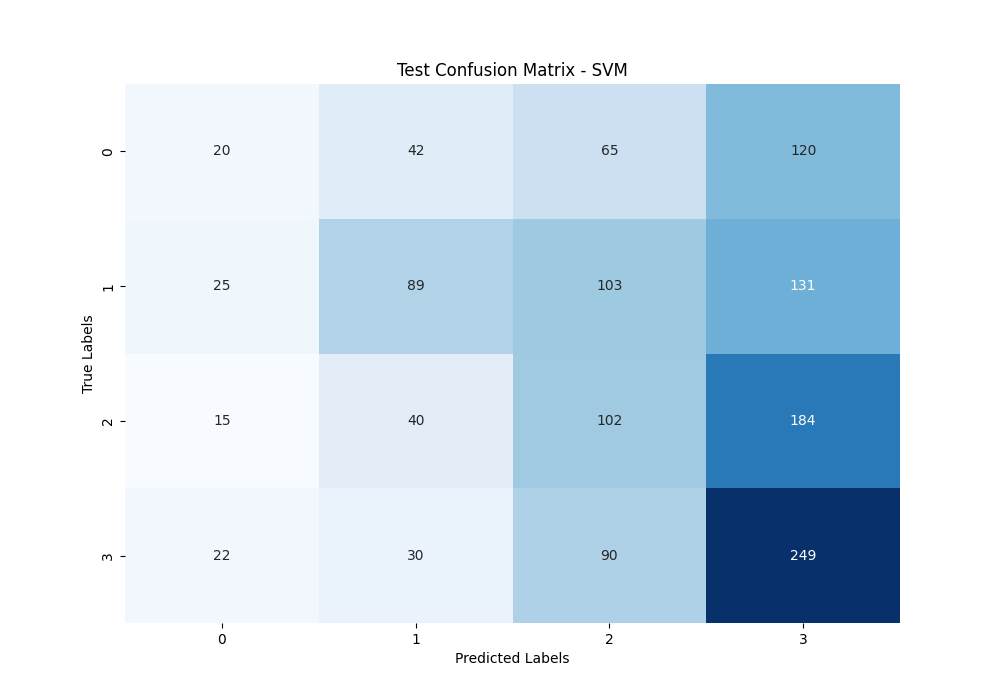

,Value
precision,0.342
recall,0.347
f1_score,0.319


In [23]:
# svm_results_emb = train_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test, seed)

# save_model_params(svm_results_emb, os.path.join(save_directory, 'svm_emb_results'))

# svm_results_emb = load_model_params(os.path.join(save_directory, 'svm_emb_results'))

# results = visualize_and_verify_results(svm_results_emb, X_val_scaled, y_val_int, X_test_scaled, y_test_int, 'svm', class_labels=None)

# Save and load the results for later

save_path = save_directory2 + "/emb_svm_results"
# save_results(results, save_path)
loaded_results = load_results(save_path)
display_loaded_results(loaded_results)

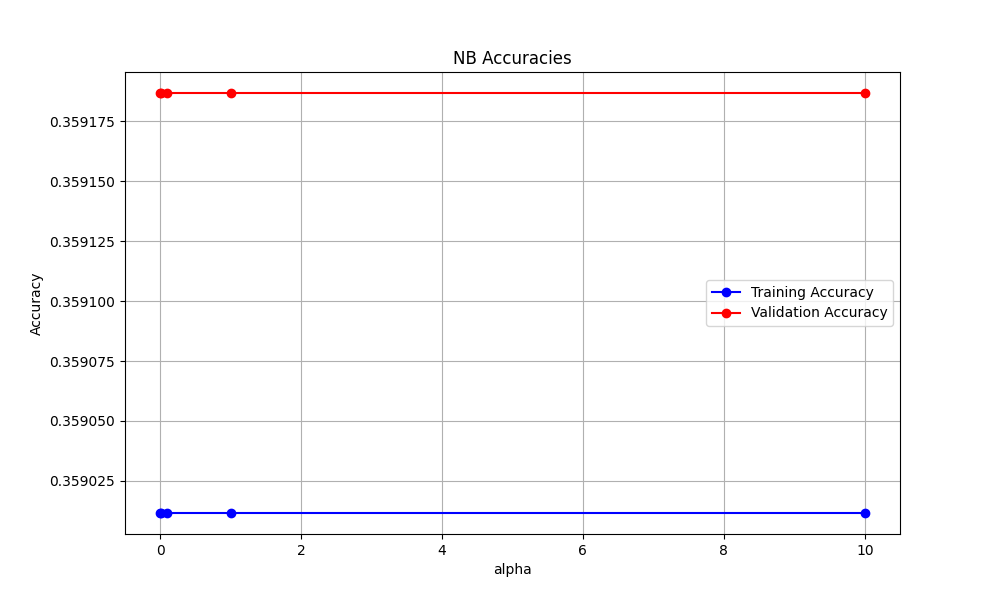

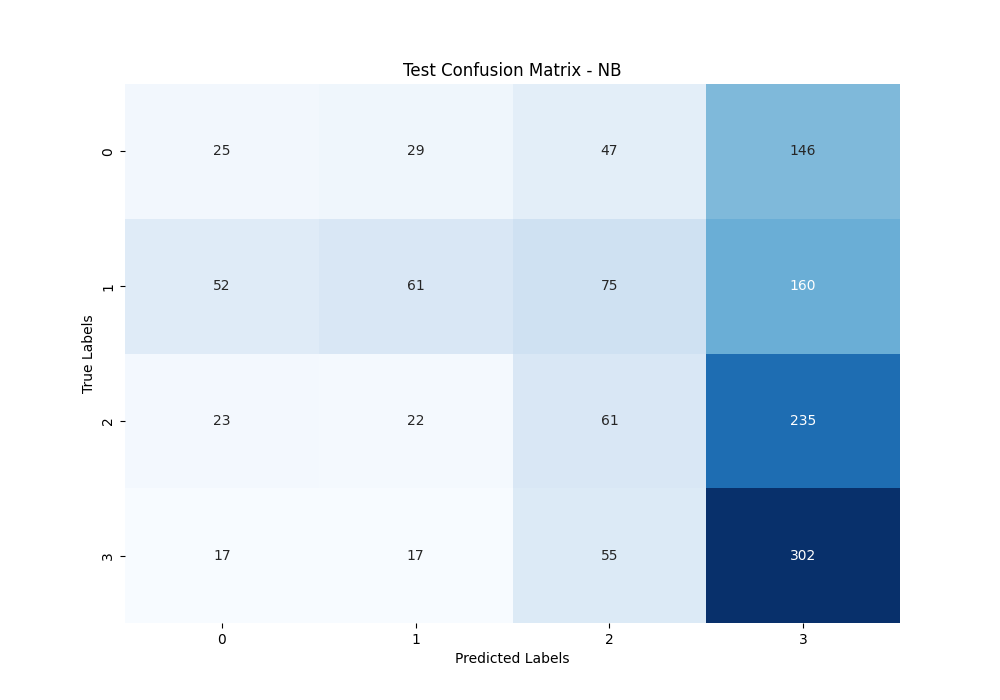

,Value
precision,0.335
recall,0.338
f1_score,0.291


In [24]:
# nb_results_emb = train_evaluate_nb(X_train, y_train, X_val, y_val, X_test, y_test)

# save_model_params(nb_results_emb, os.path.join(save_directory, 'nb_emb_results'))

# nb_results_emb = load_model_params(os.path.join(save_directory, 'nb_emb_results'))

# results = visualize_and_verify_results(nb_results_emb, X_val, y_val, X_test, y_test, 'nb', class_labels=None)

# Save and load the results for later

save_path = save_directory2 + "/emb_nb_results"
# save_results(results, save_path)
loaded_results = load_results(save_path)
display_loaded_results(loaded_results)

In [25]:
y = sentence_data['president'].values

# Split dataset into train and a temporary set (70% - 30% split)
train_df, temp_df = train_test_split(sentence_data, test_size=0.3, stratify=y, random_state=seed)

# Split the temporary set into validation and test sets (50% - 50% split of the 30%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['president'], random_state=seed)

# Assuming you have a list of unique presidents
unique_presidents = sentence_data['president'].unique()

# Create a mapping of president names to integer labels
label_map = {name: idx for idx, name in enumerate(unique_presidents)}

# Integer-encode the labels in the dataframes
train_df['president'] = train_df['president'].map(label_map)
val_df['president'] = val_df['president'].map(label_map)
test_df['president'] = test_df['president'].map(label_map)

# Convert pandas DataFrames to TensorFlow datasets
def df_to_tfdata(df, shuffle=True, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((df["sentence"].values, df["president"].values))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    ds = ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

train_ds = df_to_tfdata(train_df)
val_ds = df_to_tfdata(val_df, shuffle=False)
test_ds = df_to_tfdata(test_df, shuffle=False)

In [26]:
# Load the saved model
import tensorflow_text as text
saved_model_path = "saved_files/jared_sentences_bert"
bert_model = tf.saved_model.load(saved_model_path)

# Define a function to evaluate the model
def evaluate_model(model, dataset):
    predictions = []
    true_labels = []

    for inputs, labels in dataset:
        logits = model(inputs, training=False)  # Forward pass
        predicted_labels = np.argmax(logits, axis=1)
        true_labels.extend(labels.numpy())
        predictions.extend(predicted_labels)

    return true_labels, predictions


In [27]:
# Evaluate the model on the training, validation, and test datasets
train_true, train_pred = evaluate_model(bert_model, train_ds)
val_true, val_pred = evaluate_model(bert_model, val_ds)
test_true, test_pred = evaluate_model(bert_model, test_ds)

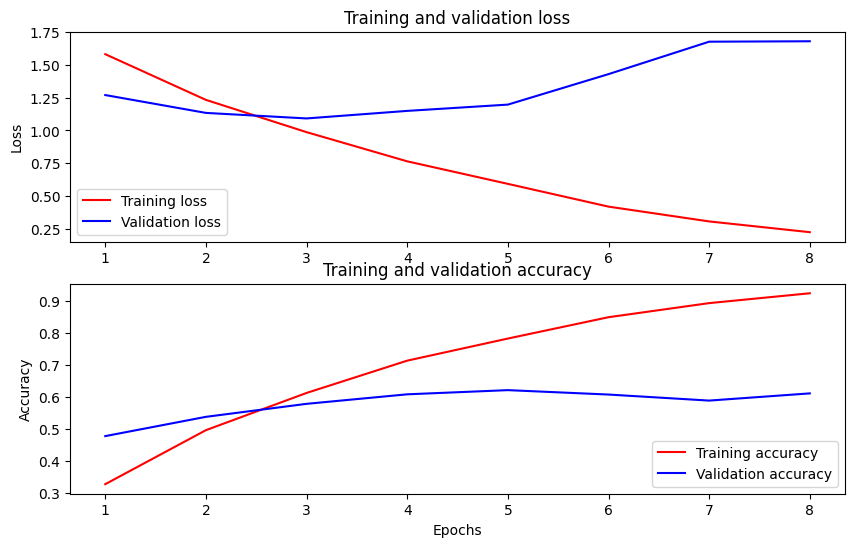

In [28]:
# Display the saved image
display(Image(filename='saved_files/train_val_curves_bert.png'))

In [29]:
def extract_metrics(y_true, y_pred):
    accuracy = np.mean(np.array(y_true) == np.array(y_pred))
    
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    return metrics

train_metrics = extract_metrics(train_true, train_pred)
val_metrics = extract_metrics(val_true, val_pred)
test_metrics = extract_metrics(test_true, test_pred)

# Create a DataFrame for a neat table
df = pd.DataFrame([train_metrics, val_metrics, test_metrics], 
                  index=['Training', 'Validation', 'Test'])

# Round the values to 3 decimal places for better presentation
df = df.round(3)

# Display the table
display(df)


/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1_score
Training,0.759,0.507,0.503,0.503
Validation,0.684,0.548,0.544,0.543
Test,0.712,0.710,0.707,0.708


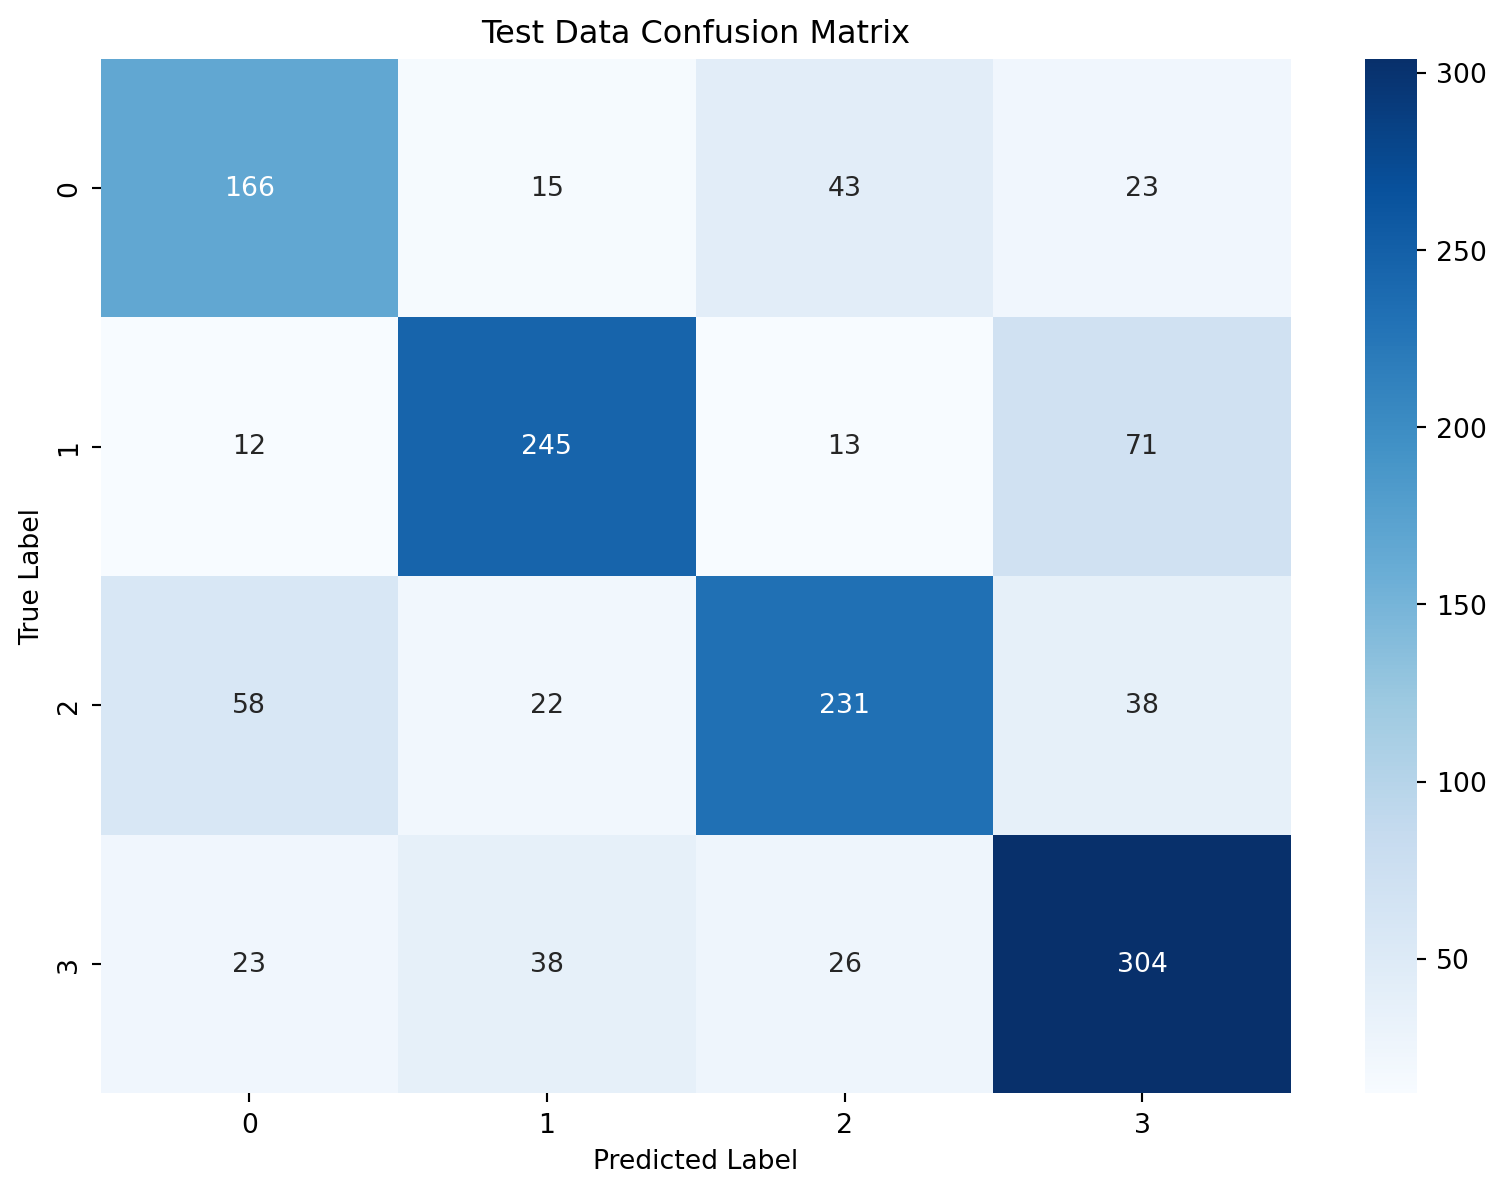

In [30]:
# Function to plot confusion matrix
def plot_confusion_matrix(true, pred, title):
    matrix = confusion_matrix(true, pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=set(true), yticklabels=set(true))
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(test_true, test_pred, title="Test Data Confusion Matrix")